In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [46]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [47]:
names = list(grouped_dataframes.keys())
grouped_dataframes[names[0]]

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1675206000,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:00-00:15,10.0,00:00
1675206900,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:15-00:30,10.0,00:15
1675207800,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:30-00:45,7.0,00:30
1675208700,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:45-01:00,3.0,00:45
1675209600,0 450-0 7/ 300 +,7.0,+,NaN,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,01:00-01:15,3.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 7/ 300 +,7.0,+,NaN,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,22:45-23:00,19.0,22:45
1704060000,0 450-0 7/ 300 +,7.0,+,NaN,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 7/ 300 +,7.0,+,NaN,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:15-23:30,NaN,23:15


In [ ]:
unique_dataframes = dict()
cords = list()
names = (grouped_dataframes.keys()) 
start_date = list()
k = 0
for name in names:
    x,y = grouped_dataframes[name]['Xkoordinat'].iloc[0], grouped_dataframes[name]['Xkoordinat'].iloc[0]
    if (x,y) not in cords:
        unique_dataframes[name] = grouped_dataframes[name]
        print("YEah", k)
        k += 1
        cords.append((x,y))
        start_date.append((grouped_dataframes[name].index[0],grouped_dataframes[name].index[1],len(grouped_dataframes[name])))


grouped_dataframes = unique_dataframes

        

YEah 0
YEah 1
YEah 2
YEah 3
YEah 4
YEah 5
YEah 6
YEah 7
YEah 8
YEah 9
YEah 10
YEah 11
YEah 12
YEah 13
YEah 14
YEah 15
YEah 16
YEah 17
YEah 18
YEah 19
YEah 20
YEah 21
YEah 22
YEah 23
YEah 24
YEah 25
YEah 26
YEah 27
YEah 28
YEah 29
YEah 30
YEah 31
YEah 32
YEah 33
YEah 34
YEah 35
YEah 36
YEah 37
YEah 38
YEah 39
YEah 40
YEah 41
YEah 42
YEah 43
YEah 44
YEah 45
YEah 46
YEah 47
YEah 48
YEah 49
YEah 50
YEah 51
YEah 52
YEah 53
YEah 54
YEah 55
YEah 56
YEah 57
YEah 58
YEah 59
YEah 60
YEah 61
YEah 62
YEah 63
YEah 64
YEah 65
YEah 66
YEah 67
YEah 68
YEah 69
YEah 70
YEah 71
YEah 72
YEah 73
YEah 74
YEah 75
YEah 76
YEah 77
YEah 78
YEah 79
YEah 80
YEah 81
YEah 82
YEah 83
YEah 84
YEah 85
YEah 86
YEah 87
YEah 88
YEah 89
YEah 90
YEah 91
YEah 92
YEah 93
YEah 94
YEah 95
YEah 96
YEah 97
YEah 98
YEah 99
YEah 100
YEah 101
YEah 102
YEah 103
YEah 104
YEah 105
YEah 106
YEah 107
YEah 108
YEah 109
YEah 110
YEah 111
YEah 112
YEah 113
YEah 114
YEah 115
YEah 116
YEah 117
YEah 118
YEah 119
YEah 120
YEah 121
YEah 122
YEa

In [104]:
from datetime import datetime
import time
def find_longest_common_period(dataframes_dict):
    """
    This function finds the longest common date range across a dictionary of dataframes, 
    where each dataframe's index is a datetime object representing the time series.
    
    Parameters:
    dataframes_dict (dict): A dictionary of DataFrames where each DataFrame has a datetime index.

    Returns:
    tuple: Start and end date of the longest common period.
    """
    # Initialize the start and end dates to the extreme opposites
    max_start_date = timestamp = time.mktime(time.strptime('1970-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))
    min_end_date = timestamp = time.mktime(time.strptime('2025-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))

    # Loop through each DataFrame to find the latest start date and earliest end date
    for df in dataframes_dict.values():
        # Get the start and end dates of each DataFrame
        df_start_date = df.index.min()
        df_end_date = df.index.max()

        # Update the max of start dates and min of end dates
        max_start_date = max(max_start_date, df_start_date)
        min_end_date = min(min_end_date, df_end_date)
        print(max_start_date, min_end_date)
    # Check if there's a valid common period
    if max_start_date <= min_end_date:
        return max_start_date, min_end_date
    else:
        return None  # No overlapping period found

find_longest_common_period(cleaned_dataframes)

1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1672873200 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400 1704062700
1677020400

In [ ]:
start_time = '2022-01-01'
end_time = '2024-01-01'




1640991600.0

In [ ]:
closest = dict()
cleaned_dataframes = {}
names = list(grouped_dataframes.keys())

for i in range(0,len(names)):
    print(i, names[i])
    df = grouped_dataframes[names[i]]
    cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']]

    cleaned_dataframes[i]['traffic_flow'].bfill(inplace=True)
    cleaned_dataframes[i]['traffic_flow'].ffill(inplace=True)
    print(cleaned_dataframes[i]['traffic_flow'].isna().sum())
    cleaned_dataframes[i]['closest_edge'] = 0
    cleaned_dataframes[i]['Xkoordinat'] = cleaned_dataframes[i]['Xkoordinat'].iloc[0]# + np.random.randint(-3000,3000)
    cleaned_dataframes[i]['Ykoordinat'] = cleaned_dataframes[i]['Ykoordinat'].iloc[0]# + np.random.randint(-3000,3000)
    x1,y1 = cleaned_dataframes[i]['Xkoordinat'].iloc[0], cleaned_dataframes[i]['Ykoordinat'].iloc[0]
    
    for j in range(0,len(names)):
        if j!=i:
            df2 = grouped_dataframes[names[j]]
            x2,y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
            if x1 != x2 and y1 != y2:
                closest[j] = euclidean_distance(x1,y1,x2,y2)

   
    
    for k in range(0,10,1):
        smallest_edge = min(closest, key=closest.get)
        cleaned_dataframes[i][f'closest_edge_{k}'] = 0
        cleaned_dataframes[i][f'closest_edge_{k}'].iloc[0] = smallest_edge
        closest.pop(smallest_edge)



In [94]:
# set max rows print option
pd.set_option('display.max_rows', 100)

start_date = pd.Series(start_date)
print(start_date.value_counts())

(1672527600, 1672528500, 61344)    24
(1672527600, 1672528500, 61056)    12
(1672527600, 1672528500, 60960)     9
(1672527600, 1672528500, 61248)     8
(1704063600, 1704064500, 26304)     8
(1672527600, 1672528500, 61152)     6
(1672527600, 1672528500, 60096)     5
(1672527600, 1672528500, 35040)     5
(1672527600, 1672528500, 56544)     4
(1672527600, 1672528500, 60192)     4
(1672527600, 1672528500, 59040)     4
(1672527600, 1672528500, 60672)     4
(1672527600, 1672528500, 59904)     4
(1672527600, 1672528500, 34560)     4
(1672527600, 1672528500, 55296)     4
(1672527600, 1672528500, 52608)     3
(1672527600, 1672528500, 33696)     3
(1672527600, 1672528500, 59616)     3
(1672527600, 1672528500, 59424)     3
(1672527600, 1672528500, 60000)     3
(1672527600, 1672528500, 34848)     3
(1672527600, 1672528500, 34752)     3
(1672527600, 1672528500, 50592)     2
(1672527600, 1672528500, 52896)     2
(1704063600, 1704064500, 50976)     2
(1672527600, 1672528500, 58560)     2
(1672527600,

In [ ]:
# import math

# def find_closest_unconnected_nodes(grouped_dataframes):
#     closest = dict()
#     cleaned_dataframes = {}
#     names = list(grouped_dataframes.keys())
#     for i, name in enumerate(names):
#         print(f"{i}/{len(names)}")
#         df = grouped_dataframes[name]
#         cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']].copy()
#         x1, y1 = df['Xkoordinat'].iloc[0], df['Ykoordinat'].iloc[0]
        
#         for j, other_name in enumerate(names):
#             if j != i:
#                 df2 = grouped_dataframes[other_name]
#                 x2, y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
#                 closest[j] = euclidean_distance(x1, y1, x2, y2)
        
#         smallest_edge = min(closest, key=closest.get)
#         cleaned_dataframes[i]['closest_edge'] = smallest_edge
#         cleaned_dataframes[i]['distance{i}-{j}'] = closest[smallest_edge]
    
#     return cleaned_dataframes

# cleaned_dataframes = find_closest_unconnected_nodes(grouped_dataframes)

0/485
1/485
2/485
3/485
4/485
5/485
6/485
7/485
8/485
9/485
10/485
11/485
12/485
13/485
14/485
15/485
16/485
17/485
18/485
19/485
20/485
21/485
22/485
23/485
24/485
25/485
26/485
27/485
28/485
29/485
30/485
31/485
32/485
33/485
34/485
35/485
36/485
37/485
38/485
39/485
40/485
41/485
42/485
43/485
44/485
45/485
46/485
47/485
48/485
49/485
50/485
51/485
52/485
53/485
54/485
55/485
56/485
57/485
58/485
59/485
60/485
61/485
62/485
63/485
64/485
65/485
66/485
67/485
68/485
69/485
70/485
71/485
72/485
73/485
74/485
75/485
76/485
77/485
78/485
79/485
80/485
81/485
82/485
83/485
84/485
85/485
86/485
87/485
88/485
89/485
90/485
91/485
92/485
93/485
94/485
95/485
96/485
97/485
98/485
99/485
100/485
101/485
102/485
103/485
104/485
105/485
106/485
107/485
108/485
109/485
110/485
111/485
112/485
113/485
114/485
115/485
116/485
117/485
118/485
119/485
120/485
121/485
122/485
123/485
124/485
125/485
126/485
127/485
128/485
129/485
130/485
131/485
132/485
133/485
134/485
135/485
136/485
137/485
138/48

In [80]:
# Initialize the graph
graph = nx.Graph()

names = list(cleaned_dataframes.keys())

# Add nodes and edges to the graph
for i in range(len(names)):
    idx = cleaned_dataframes[names[i]].first_valid_index()
    
    # Add node with attributes
    graph.add_node(
        i,
        x=cleaned_dataframes[names[i]]['Xkoordinat'][idx],
        y=cleaned_dataframes[names[i]]['Ykoordinat'][idx],
        traffic=cleaned_dataframes[names[i]]['traffic_flow'].values
    )
    k = 0
    for j in range(0,10,1):
        # Get the ID of the closest edge and add an edge between nodes
        closest_node = cleaned_dataframes[names[i]][f'closest_edge_{j}'].iloc[0]
        print(i,closest_node)
        graph.add_edge(i, closest_node)  # Add edge by node indices (i, closest_node)
        #graph.add_edge(i, np.random.randint(484))  # Add edge by node indices (i, closest_node)


0 1
0 144
0 159
0 151
0 145
0 154
0 157
0 143
0 152
0 139
1 0
1 144
1 159
1 151
1 145
1 154
1 157
1 146
1 179
1 143
2 70
2 50
2 3
2 59
2 65
2 4
2 46
2 47
2 176
2 5
3 59
3 65
3 70
3 50
3 4
3 2
3 46
3 47
3 176
3 5
4 65
4 59
4 3
4 70
4 50
4 2
4 46
4 47
4 176
4 5
5 51
5 6
5 66
5 7
5 71
5 60
5 47
5 46
5 8
5 52
6 66
6 7
6 71
6 51
6 60
6 5
6 8
6 52
6 9
6 72
7 71
7 66
7 6
7 51
7 60
7 8
7 5
7 52
7 9
7 72
8 52
8 9
8 72
8 60
8 10
8 169
8 7
8 71
8 66
8 6
9 72
9 52
9 8
9 10
9 169
9 60
9 7
9 71
9 66
9 6
10 9
10 72
10 52
10 169
10 8
10 60
10 175
10 11
10 7
10 71
11 12
11 10
11 169
11 175
11 9
11 72
11 52
11 8
11 13
11 53
12 11
12 13
12 53
12 54
12 58
12 73
12 61
12 14
12 175
12 10
13 53
13 54
13 58
13 73
13 61
13 14
13 12
13 15
13 16
13 17
14 61
14 73
14 58
14 54
14 53
14 13
14 15
14 16
14 17
14 12
15 16
15 17
15 14
15 61
15 18
15 73
15 19
15 67
15 62
15 58
16 15
16 17
16 18
16 14
16 61
16 19
16 67
16 62
16 73
16 58
17 16
17 15
17 18
17 19
17 67
17 62
17 14
17 61
17 73
17 58
18 19
18 67
18 62
18 17
1

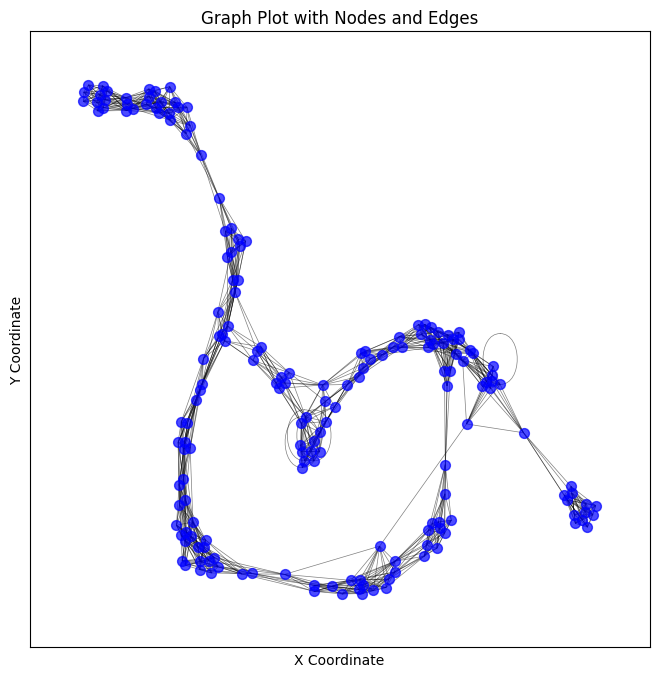

In [81]:

# Define the positions of the nodes using their 'x' and 'y' attributes
pos = nx.spring_layout(graph, seed=1337)  # Use a fixed seed for reproducibility


# Plot the graph
plt.figure(figsize=(8, 8))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [69]:

def clean_graph(graph):
    # Remove self-loops
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    
    # Remove duplicate edges (not necessary for undirected graphs in NetworkX)
    # Here just in case your graph is directed or you need further verification
    edges_to_remove = []
    for u, v, data in graph.edges(data=True):
        if graph.number_of_edges(u, v) > 1:  # More than one edge exists
            edges_to_remove.append((u, v))
    
    graph.remove_edges_from(edges_to_remove)
    
    print(f"Removed {len(self_loops)} self-loops and {len(edges_to_remove)} duplicate edges.")
    return graph

graph = clean_graph(graph)

Removed 0 self-loops and 0 duplicate edges.


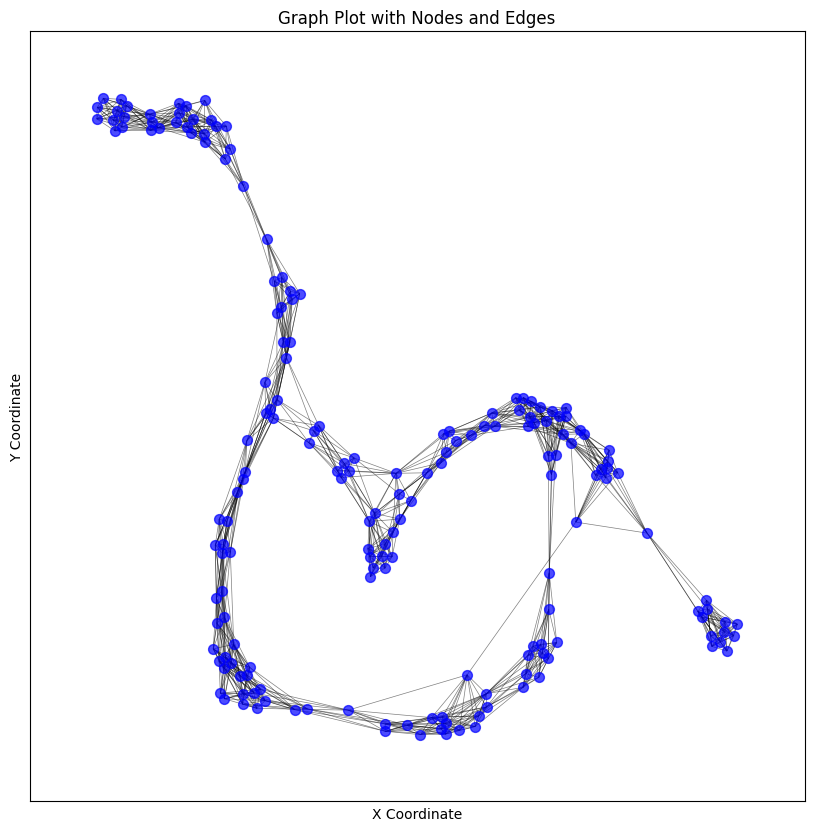

In [57]:
# extract largest component
largest_component = max(nx.connected_components(graph), key=len)
subgraph = graph.subgraph(largest_component)
# Plot the graph
plt.figure(figsize=(10, 10))

# Draw nodes with custom size
nx.draw_networkx_nodes(subgraph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(subgraph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

180

In [70]:
nx.write_graphml(graph, "graph.graphml")

NetworkXError: GraphML writer does not support <class 'dict'> as data values.